# Intake Catalogs

> You must be using **Python 3.6** or newer for this feature

Intake is a lightweight package for finding, investigating, loading and disseminating data. It will appeal to different groups for some of the reasons below, but is useful for all and acts as a common platform that everyone can use to smooth the progression of data from developers and providers to users.

- Source: https://github.com/intake/intake
- Docs: https://intake.readthedocs.io/en/latest/catalog.html

In [1]:
from podpac.datalib import IntakeCatalog

## Precip Example

In [2]:
node = IntakeCatalog(uri='../../data/intake/precip/catalog.yml',   # path to catalog
                     source='southern_rockies',  # name of the source within catalog
                    )

In [3]:
# the node.catalog attribute contains the loaded intake catalog
node.catalog

precip:
  args:
    path: ../../data/intake/precip/catalog.yml
  description: ''
  driver: intake.catalog.local.YAMLFileCatalog
  metadata: {}


In [4]:
# the node.dataset attribute contains the loaded intake catalog source
node.dataset

southern_rockies:
  args:
    csv_kwargs:
      names:
      - time
      - precip
      parse_dates:
      - time
      skiprows: 3
    urlpath: D:/podpac-2.2.0/podpac-examples/notebooks/5-datalib/../../data/intake/precip//data/SRLCC_{emissions}_Precip_{model}.csv
  description: These data sets are subsets of the Maurer, et al. (2007) bias corrected,
    spatially downscaled monthly climate predictions. The CSV files here cover three
    emissions scenarios b1 (low emissions and rate of change), a1b (middle) and a2
    (high). Emission scenarios are possibilities for how the future will unfold in
    terms of greenhouse gas emissions, land use and other environmental factors.
  driver: intake.source.csv.CSVSource
  metadata:
    catalog_dir: D:/podpac-2.2.0/podpac-examples/notebooks/5-datalib/../../data/intake/precip/
    fields:
      precip:
        label: Precipitation
        unit: mean mm/day
    origin: https://www.sciencebase.gov/catalog/item/511e740de4b071e86a19a524
    plot:


In [5]:
# node.source_data contains the read dataset
node.source_data

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


,time,precip,emissions,model
0,1950-01-16 00:00:00+00:00,0.972319,a1b,ECHAM5-MPI
1,1950-02-16 00:00:00+00:00,0.406381,a1b,ECHAM5-MPI
2,1950-03-15 00:00:00+00:00,1.750826,a1b,ECHAM5-MPI
3,1950-04-15 00:00:00+00:00,1.014236,a1b,ECHAM5-MPI
4,1950-05-15 00:00:00+00:00,0.761423,a1b,ECHAM5-MPI
...,...,...,...,...
1795,2099-08-15 00:00:00+00:00,1.289281,b1,PCM-NCAR
1796,2099-09-15 00:00:00+00:00,1.126443,b1,PCM-NCAR
1797,2099-10-15 00:00:00+00:00,1.285412,b1,PCM-NCAR
1798,2099-11-15 00:00:00+00:00,3.346398,b1,PCM-NCAR


In [6]:
node = IntakeCatalog(uri='../../data/intake/precip/catalog.yml',   # path to catalog
                     source='southern_rockies',  # name of the source within catalog
                     field='precip',         # this can be defined in catalog source metadata
                     dims={'time': 'time'},   # this can be defined in catalog source metadata
                     query="(emissions == 'b1') & (model == 'ECHAM5-MPI')"
                    )

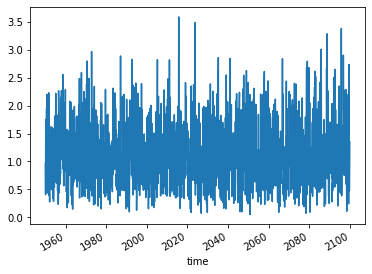

In [7]:
# one the node is defined, it works like any other podpac node
# podpac uses intake to read the data internally
output = node.eval(node.coordinates)
output.plot()
pass